## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [70]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
data.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [4]:
X = data[["age", "chol"]]
y = data["diagnosis"]

In [176]:
my_pipeline = Pipeline(
    [("Logistic Regression", LogisticRegression())]
)

fitted_pipeline = my_pipeline.fit(X, y)

coefs = fitted_pipeline.named_steps["Logistic Regression"].coef_

intercept = fitted_pipeline.named_steps["Logistic Regression"].intercept_

x_values_logistic = np.linspace(30, 80, 100)

y_values_logistic = (-coefs[0][0] / coefs[0][1]) * x_values_logistic - intercept / coefs[0][1]

In [159]:
chol55 = (np.log(.9/.1) + -intercept[0] - 55*coefs[0][0]) / coefs[0][1]
chol55

1587.7158792751788

In [177]:
df_logistic = pd.DataFrame({
    "x": list(range(40, 70)),
    "y": list(map(lambda x: (-coefs[0][0] / coefs[0][1]) * x - intercept / coefs[0][1], range(40, 70)))
})
df_logistic['x'] = df_logistic["x"].astype(float)
df_logistic['y'] = df_logistic["y"].astype(float)

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [178]:
my_pipeline = Pipeline(
    [("LDA", LinearDiscriminantAnalysis())]
)

fitted_pipeline = my_pipeline.fit(X, y)

coefs = fitted_pipeline.named_steps["LDA"].coef_

intercept = fitted_pipeline.named_steps["LDA"].intercept_

In [162]:
chol55 = (np.log(.9/.1) + -intercept[0] - 55*coefs[0][0]) / coefs[0][1]
chol55

1595.9634486996954

In [179]:
df_lda = pd.DataFrame({
    "x": list(range(40, 70)),
    "y": list(map(lambda x: (-coefs[0][0] / coefs[0][1]) * x - intercept / coefs[0][1], range(40, 70)))
})
df_lda['x'] = df_lda["x"].astype(float)
df_lda['y'] = df_lda["y"].astype(float)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [180]:
my_pipeline = Pipeline(
    [("SVC", SVC(kernel = "linear"))]
)

fitted_pipeline = my_pipeline.fit(X, y)

coefs = fitted_pipeline.named_steps["SVC"].coef_

intercept = fitted_pipeline.named_steps["SVC"].intercept_

In [165]:
chol55 = (np.log(.9/.1) + -intercept[0] - 55*coefs[0][0]) / coefs[0][1]
chol55

913.205484047338

In [181]:
df_svc = pd.DataFrame({
    "x": list(range(40, 70)),
    "y": list(map(lambda x: (-coefs[0][0] / coefs[0][1]) * x - intercept / coefs[0][1], range(40, 70)))
})
df_svc['x'] = df_svc["x"].astype(float)
df_svc['y'] = df_svc["y"].astype(float)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

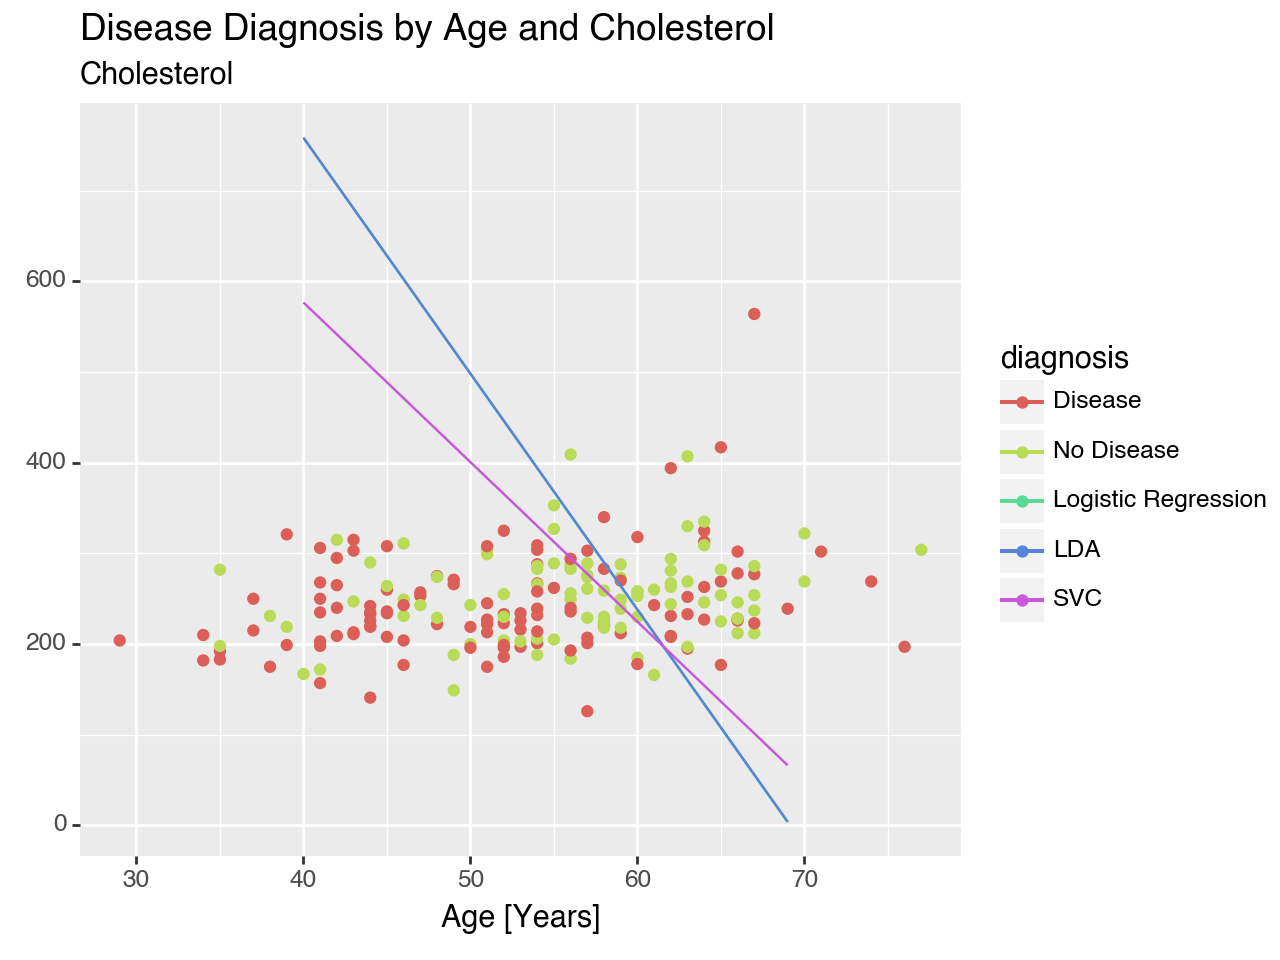

<Figure Size: (640 x 480)>

In [182]:
from plotnine import ggplot, aes, labs, geom_point, geom_line
(ggplot(data, aes(x = "age", y = "chol", color = "diagnosis")) +
    geom_point() + 
    geom_line(df_logistic, aes(x = "x", y = "y", color = '"Logistic Regression"')) +
    geom_line(df_lda, aes(x = "x", y = "y", color = '"LDA"')) + 
    geom_line(df_svc, aes(x = "x", y = "y", color = '"SVC"')) +
    labs(
        x = "Age [Years]",
        y = "",
        subtitle = "Cholesterol",
        title = "Disease Diagnosis by Age and Cholesterol"
    )
)